### Required Assignment 6.1: Analyzing results of PCA, Plotting values and Adjusting Parameters for Variance

**Expected Time: 120 Minutes**

**Total Points: 28**

This activity explores principal component analysis through two examples -- image data and tabular data. These examples are meant to demonstrate how PCA extracts important information from the data while reducing its dimensionality. Next, you will build a scree plot with Python. A scree plot can be used to determine how many Principal Components to keep in a given dataset.  Using a `sklearn` built-in housing dataset, you will plot the values of $\Sigma$ in decreasing order -- this is a scree plot.  For more on-scree plots see [here](https://en.wikipedia.org/wiki/Scree_plot#:~:text=In%20multivariate%20statistics%2C%20a%20scree,principal%20component%20analysis%20(PCA).). In the last part of this activity, you will determine how many components are required to explain a proportion of variance.  
### Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)
- [Problem 7](#Problem-7)
- [Problem 8](#Problem-8)
- [Problem 9](#Problem-9)
- [Problem 10](#Problem-10)

In [1]:
from scipy.linalg import svd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces, fetch_california_housing
from sklearn.datasets import make_regression
from sklearn.datasets import fetch_openml

#### The Datasets

Both datasets are built into the `sklearn` library.  The first is a familiar set of faces, such as 1-Dimensional Arrays, and the second is a dataset on housing prices in Californian neighborhoods.  The image data is limited to a single image and assigned to the variable `image` below.  The housing data is displayed as a DataFrame with the `.frame` attribute after setting `as_frame = True`.  

In [2]:
faces_data = pd.read_csv('data/faces.csv')
cali_housing = fetch_california_housing(return_X_y=False, as_frame=True, data_home='data')

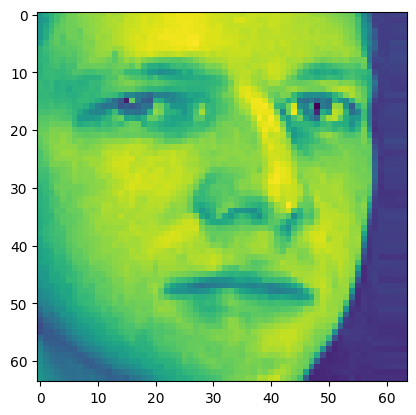

In [3]:
image = faces_data.iloc[4].values.reshape(64, 64)
plt.imshow(image)

In [4]:
df = cali_housing.frame.head(5)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Principal Component Analysis 

Recall the steps to perform Principal Component Analysis on an array.  

```
- standardize the data
- perform SVD
- select how many components to keep
```

From here, depending on the goal, you will either eliminate all but the top `r` values in $\Sigma$ or evaluate the product of $U_r \dot \Sigma_r$.

[Back to top](#Index:) 

## Problem 1

### Function to Standardize and Factor

**4 Points**

Complete the function `svd_norm` according to the instructions below:

- The function should take, as input, an array `X`.
- The function should scale the array `X` using its mean and standard deviation and assign the result to ` x_norm`.
- The function should use the `svd` function to factor `x_norm` using `full_matrices` equal to `False` and assign the result to `U`, `sigma`, and `VT`.
- The function should use `np.diag()` to define a diagonal matrix with the singular values on the main diagonal and assign the result to `Sigma`.
- The function should return three arrays `U`, `Sigma` and `VT`.


In [5]:
### GRADED

def svd_norm(X):
    """This function takes in an array X, scales it according 
    to the transformation X - mu / sigma where mu is the mean
    and sigma the standard deviation of the dataset.

    Parameters
    ----------
    X: type `np.array`, shape (N, M)
        
    Returns
    -------
    A tuple (U, Sigma, VT) where
        U: type `np.ndarray`, shape (N, M)
            Numpy arrays with N rows, M columns 
        Sigma: type `np.ndarray`, shape (M, M)
            Numpy arrays with M rows and M columns
            A Diagonal matrix with the singular values on main diagonal
        VT: type `np.ndarray`, shape (M, M)
            Numpy array with M rows and M columns representing V Transpose
    """
    # Standardize the data
    mu = np.mean(X)
    sigma = np.std(X)
    x_norm = (X - mu) / sigma

    # Perform SVD
    U, singular_values, VT = svd(x_norm, full_matrices=False)

    # Create diagonal matrix Sigma
    Sigma = np.diag(singular_values)

    return U, Sigma, VT


# YOUR CODE HERE

# Answer check
U, Sigma, VT = svd_norm(image)
print(U.shape, Sigma.shape, VT.shape)

(64, 64) (64, 64) (64, 64)


[Back to top](#Index:) 

## Problem 2

### Reconstructing the Image

**4 Points**

To complete this problem, follow the instructions below:

- Apply the `svd_norm` function you defined in Problem 1 to `image` and assign the result to `U`, `Sigma`, and `VT`.
- Use the `np.copy` function with argument `Sigma` to make a copy of the $\Sigma$ matrix and assign  the result to `Sigma_copy`.
- Set all but the first 5 singular values of `Sigma_copy` (first 25 values - 5x5 matrix) to zero.
-  Reconstruct the original image by multiplying $U \Sigma_{copy} VT$ with the `@` operator and assign the result to `simpler_image`. 

Note how much information from the image is captured in the first five singular values!

(64, 64)


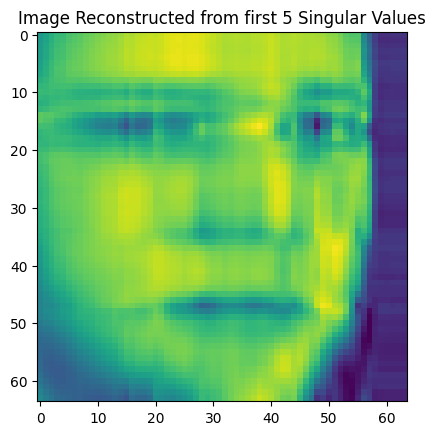

In [6]:
### GRADED

Sigma_copy = None
simpler_image = None

# YOUR CODE HERE
U, Sigma, VT = svd_norm(image)
Sigma_copy = np.copy(Sigma) 
Sigma_copy[5:, 5:] = 0
simpler_image = U @ Sigma_copy @ VT

# Answer check
print(simpler_image.shape)
plt.imshow(simpler_image)
plt.title('Image Reconstructed from first 5 Singular Values');

[Back to top](#Index:) 

## Problem 3

### Repeat for Tabular Data

**4 Points**

As the example above demonstrates, using Principal Component Analysis is a way of extracting important information from the data through the SVD.  Now, you are to extract the matrix factorization from the SVD using the housing data `df`.  The earlier `svd_norm` function should work to factor a DataFrame.  Use your function to extract $U, \Sigma, VT$ from the DataFrame.  Assign your results to `U, Sigma, VT` below.

In [7]:
### GRADED

U, Sigma, VT = None, None, None

# YOUR CODE HERE
df = cali_housing.frame
U, Sigma, VT = svd_norm(df.values)

# Answer check
print(type(U))
print(df.shape, Sigma.shape)

<class 'numpy.ndarray'>
(20640, 9) (9, 9)


[Back to top](#Index:) 

## Problem 4

## Function to project into lower dimension `r`

**4 Points**

Complete the function `pca` below according to the instructions below:

- The function takes two arguments, `X` and `r` where `X` is an array or DataFrame and `r` is a dimension to project the data down into.
- The function should scale the array `X` using its mean and standard deviation and assign the result to ` x_norm`.
- The function should use the `svd` function to factor `x_norm` using `full_matrices` equal to `False` and assign the result to `U`, `sigma`, and `VT`.
- The function should use `np.diag()` to define a diagonal matrix with the singular values on the main diagonal anfd assign the result to `Sigma`.
- The function should extract all the rows and the first `r` columns of `U` and assign the result to `Ur`.
- The function should extract the first `r` rows and columns of `Sigma` and assign the result to `Sigma_r`.
- The function should returns a DataFrame of shape `(N, r)` with columns labeled `pca_1`, `pca_2`, ..., `pca_r`. To achieve this use the code `pd.DataFrame(Ur @ Sigma_r, columns = [f'pca_{i}' for i in range(1, r + 1)])`



In [18]:
### GRADED

def pca(X, r = 5):
    """This function takes in an array X, and extracts
    r principal components.  These are returned in a DataFrame.

    Parameters
    ----------
    X: type `np.array`, shape (N, M)
    r: type `int`
        
    Returns
    -------
    A DataFrame of shape (N, r) with columns labeled
    pca_1. | pca_2 | .... | pca_r |
    
    """
    # Standardize the data
    mu = np.mean(X)
    sigma = np.std(X)
    x_norm = (X - mu) / sigma

    # Perform SVD
    U, singular_values, VT = svd(x_norm, full_matrices=False)

    # Create diagonal matrix Sigma
    Sigma = np.diag(singular_values)

    # Extract first r components
    Ur = U[:, :r]
    Sigma_r = Sigma[:r, :r]

    # Return DataFrame with principal components
    return pd.DataFrame(Ur @ Sigma_r, columns=[f'pca_{i}' for i in range(1, r + 1)])


# YOUR CODE HERE

# Answer check
XT = pca(df, r = 2)
print(XT.shape)
XT.head()

(1460, 2)


,pca_1,pca_2
0,-43987.966049,1.184968
1,-43986.191161,-0.480221
2,-43987.621004,1.419663
3,-43988.525070,-0.476429
4,-43986.906641,3.864360


These examples offer insight into how PCA can reduce the dimensionality of your data while keeping important information about underlying relationships intact.  

[Back to top](#Index:) 

## Problem 5

### Extracting $\Sigma$

**2 Points**

Complete the function `singular_values` according to the instructions below:

- The function takes, as input, an aray `X`, and a booloean flag `scale`, describing whether you want to scale the array `X` or not.
- Using an `if` statement, check if `scale` is `True`. If it is, scale `X` using its mean and standard deviation.
- If `scale` is not `True`, use the `svd` function to factor `X` into  `u`, `sigma`, and `vt`.
- The function should return the numpy array of singular values of X, `sigma`.

In [19]:
### GRADED

def singular_values(X, scale = False):
    """Return the singular values resulting from 
    SVD decomposition.  

    Parameters
    ----------
    X: np.array or pd.DataFrame
        An array of data
    scale: boolean
        Boolean determines whether data needs to be scaled

    Returns an numpy array of singular values of X
    """
    # YOUR CODE HERE 
    if scale:
        mu = np.mean(X)
        sigma = np.std(X)
        x_norm = (X - mu) / sigma
        _, singular_values, _ = svd(x_norm, full_matrices=False)
    else:
        _, singular_values, _ = svd(X, full_matrices=False)
    
    return singular_values

# YOUR CODE HERE

# Answer check
print(type(singular_values(df)))
sigma = singular_values(df)
print(sigma.shape)

<class 'numpy.ndarray'>
(35,)


[Back to top](#Index:) 

## Problem 6

### Plotting $\Sigma$

**1 Points**

Using the function above, build a plot of the singular values. Use your plot to determine how many principal components you should keep from the DataFrame `df`.  Assign your solution as an integer to `ans2` below.

/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


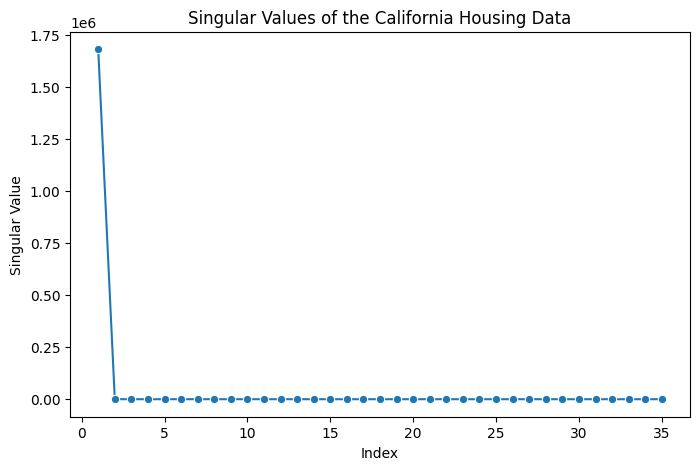

In [20]:
### GRADED

#plot of singular values here
singular_vals = singular_values(df, scale=True)
plt.figure(figsize=(8, 5))
sns.lineplot(x=np.arange(1, len(singular_vals) + 1), y=singular_vals, marker='o')
plt.title('Singular Values of the California Housing Data')
plt.xlabel('Index')
plt.ylabel('Singular Value')


#how many components should you keep?
ans2 = 2


Depending on the dataset, we may have a different number of principal components to keep.  While not a hard fast statistical test, using a scree plot can provide some information on the appropriate number of values to keep.  

In the last part of the assignment, you will use a dataset that is a larger example of a housing dataset related to individual houses and features in Ames Iowa.  For our purposes the non-null numeric data is selected. To import the data, run the code cells below:

In [21]:
#fetching the data
housing = fetch_openml(name="house_prices", as_frame=True, data_home='data')

In [22]:
#examine the dataframe
housing.frame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [23]:
#select numeric data and drop missing values
df = housing.frame.select_dtypes(['float', 'int']).dropna(axis = 1)#.select_dtypes(['int', 'float'])

[Back to top](#Index:) 

## Problem 7

### Scale the data

**2 Points**

Scale the `df` data using its mean and standard deviation so that it is ready for SVD.  Assign the scaled data to `df_scaled` below.  

In [24]:
### GRADED

mu = np.mean(df)
sigma = np.std(df)
df_scaled = (df - mu) / sigma

# Answer check
print(type(df_scaled))
#print(df_scaled.describe())

<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


[Back to top](#Index:) 

## Problem 8

### Extracting $\Sigma$

**2 Points**

Using the scaled data, extract the singular values from the data using the `scipy.linalg` function `svd`.  Assign your results to `U`, `sigma`, and `VT` below. 

In [25]:
### GRADED

U, sigma, VT = '', '', ''

# Extract the singular values from the data 
U, sigma, VT = svd(df_scaled.values, full_matrices=False)

# Answer check
print(type(sigma))
print(sigma.shape)

<class 'numpy.ndarray'>
(35,)


[Back to top](#Index:) 

## Problem 9

### Percent Variance Explained

**2 Points**

Divide `sigma` by the sum of the singular values to compute the percent variance explained. Assign your result as a percent array to `percent_variance_explained` below.  

Note that due to rounding this percent won't sum to exactly 1.  

In [26]:
### GRADED

# Calculate the percent variance explained
# The variance explained by each singular value is its square.
# The total variance is the sum of the squares of all singular values.
percent_variance_explained = sigma / np.sum(sigma)

# YOUR CODE HERE
print(percent_variance_explained.shape)
print(percent_variance_explained.sum())

(35,)
0.9999999999999998


[Back to top](#Index:) 

## Problem 10

### Cumulative Variance Explained

**3 Points**

Using the solution to problem 10, how many principal components are necessary to retain up to 80% of the explained variance if we consider them in descending order?  Assign your response to `ans11` below as an integer. 

**HINT**: explore the `np.cumsum` function.

In [27]:
### GRADED

# Calculate the cumulative sum of the percent variance explained
cumulative_variance_explained = np.cumsum(percent_variance_explained)
ans11 = np.argmax(cumulative_variance_explained >= 0.8) + 1  # +1 because indices start at 0    

# YOUR CODE HERE
print(type(ans11))
print(ans11)

<class 'numpy.int64'>
1
